To analazy if the patient or the adult person is asleep, awake or walking at the current movement

In [19]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from scipy import stats
import math
from tensorflow.keras import layers



%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print versions
print('TensorFlow ' + tf.__version__)


TensorFlow 2.15.0


In [20]:
file_path = '/content/drive/MyDrive/dataset/Accelerometer_data_sleeptracking.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_csv(file_path)


df.head()


,X_Acc,Y_Acc,Z_Acc,Sleep_Stage
0,X-Acceleration: 0.00 g,Y-Acceleration: 0.09 g,Z-Acceleration: 1.42 g,Sleep
1,X-Acceleration: 0.02 g,Y-Acceleration: 0.10 g,Z-Acceleration: 1.42 g,Sleep
2,X-Acceleration: 0.01 g,Y-Acceleration: 0.09 g,Z-Acceleration: 1.42 g,Sleep
3,X-Acceleration: 0.02 g,Y-Acceleration: 0.09 g,Z-Acceleration: 1.43 g,Sleep
4,X-Acceleration: 0.02 g,Y-Acceleration: 0.09 g,Z-Acceleration: 1.43 g,Sleep


In [ ]:
# summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   X_Acc        182 non-null    object
 1   Y_Acc        182 non-null    object
 2   Z_Acc        182 non-null    object
 3   Sleep_Stage  182 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


**Cleaning the Dataset and Preprocessing**

In [21]:
import re

# Expression to match numbers with decimals, plus and minus signs
pattern = re.compile(r'[-+]?\d*\.?\d+')
# Function to extract numbers from each string
def extract_numbers(text):
    return ''.join(pattern.findall(text))

# Applying the function to each column in the DataFrame
for column in df.columns:
    df['X_Acc'] = df['X_Acc'].apply(extract_numbers)
    df['Y_Acc'] = df['Y_Acc'].apply(extract_numbers)
    df['Z_Acc'] = df['Z_Acc'].apply(extract_numbers)



print(df)




     X_Acc Y_Acc Z_Acc Sleep_Stage
0     0.00  0.09  1.42       Sleep
1     0.02  0.10  1.42       Sleep
2     0.01  0.09  1.42       Sleep
3     0.02  0.09  1.43       Sleep
4     0.02  0.09  1.43       Sleep
..     ...   ...   ...         ...
177  -0.19  0.07  1.04       Awake
178   0.23  0.21  1.31       Awake
179   0.11  0.40  1.35       Awake
180  -0.10  0.28  1.42       Awake
181  -0.11  0.35  1.38       Awake

[182 rows x 4 columns]


In [ ]:
df.head()

,X_Acc,Y_Acc,Z_Acc,Sleep_Stage
0,0.00,0.09,1.42,Sleep
1,0.02,0.10,1.42,Sleep
2,0.01,0.09,1.42,Sleep
3,0.02,0.09,1.43,Sleep
4,0.02,0.09,1.43,Sleep


In [22]:
#converting into float

df['X_Acc'] = df['X_Acc'].astype(float)
df['Y_Acc'] = df['Y_Acc'].astype(float)
df['Z_Acc'] = df['Z_Acc'].astype(float)
print(df.dtypes)


X_Acc          float64
Y_Acc          float64
Z_Acc          float64
Sleep_Stage     object
dtype: object


In [ ]:
print(df)

print(df.dtypes)

     X_Acc  Y_Acc  Z_Acc Sleep_Stage
0     0.00   0.09   1.42       Sleep
1     0.02   0.10   1.42       Sleep
2     0.01   0.09   1.42       Sleep
3     0.02   0.09   1.43       Sleep
4     0.02   0.09   1.43       Sleep
..     ...    ...    ...         ...
177  -0.19   0.07   1.04       Awake
178   0.23   0.21   1.31       Awake
179   0.11   0.40   1.35       Awake
180  -0.10   0.28   1.42       Awake
181  -0.11   0.35   1.38       Awake

[182 rows x 4 columns]
X_Acc          float64
Y_Acc          float64
Z_Acc          float64
Sleep_Stage     object
dtype: object


Exploratory Data Analysis

In [23]:
#sleep counts
SleepCounts = df['Sleep_Stage'].value_counts()
print(SleepCounts)

Sleep_Stage
Awake    109
Sleep     73
Name: count, dtype: int64


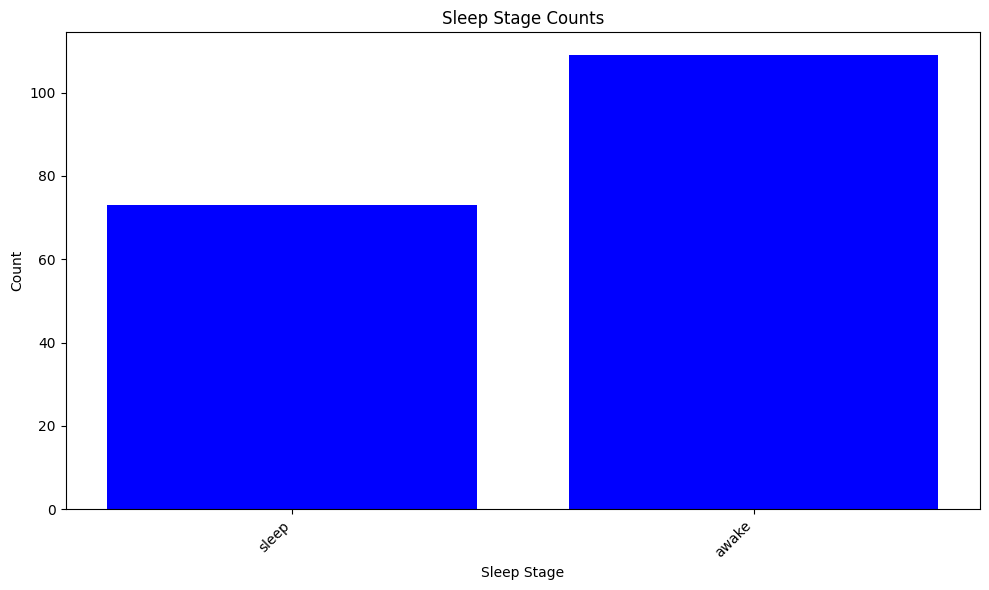

In [24]:
activities = ['sleep', 'awake']
counts = [73, 109]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(activities, counts, color='blue')  # Create the bar plot
plt.xlabel('Sleep Stage')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Sleep Stage Counts')  # Title for the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


In [25]:

#in order to convert the model into C
! pip install "everywhereml>=0.2.32"


In [26]:
print(df['X_Acc'])
print(df['Y_Acc'])
print(df['Z_Acc'])

0      0.00
1      0.02
2      0.01
3      0.02
4      0.02
       ... 
177   -0.19
178    0.23
179    0.11
180   -0.10
181   -0.11
Name: X_Acc, Length: 182, dtype: float64
0      0.09
1      0.10
2      0.09
3      0.09
4      0.09
       ... 
177    0.07
178    0.21
179    0.40
180    0.28
181    0.35
Name: Y_Acc, Length: 182, dtype: float64
0      1.42
1      1.42
2      1.42
3      1.43
4      1.43
       ... 
177    1.04
178    1.31
179    1.35
180    1.42
181    1.38
Name: Z_Acc, Length: 182, dtype: float64


In [27]:
# Calculate delta values
df['delta_x'] = df['X_Acc'].diff().fillna(0)
df['delta_y'] = df['Y_Acc'].diff().fillna(0)
df['delta_z'] = df['Z_Acc'].diff().fillna(0)

In [13]:
print(df['delta_x'])
print(df['delta_y'])
print(df['delta_z'])

0      0.00
1      0.02
2     -0.01
3      0.01
4      0.00
       ... 
177   -0.42
178    0.42
179   -0.12
180   -0.21
181   -0.01
Name: delta_x, Length: 182, dtype: float64
0      0.00
1      0.01
2     -0.01
3      0.00
4      0.00
       ... 
177   -0.27
178    0.14
179    0.19
180   -0.12
181    0.07
Name: delta_y, Length: 182, dtype: float64
0      0.00
1      0.00
2      0.00
3      0.01
4      0.00
       ... 
177   -0.31
178    0.27
179    0.04
180    0.07
181   -0.04
Name: delta_z, Length: 182, dtype: float64


In [ ]:
print(df)

     X_Acc  Y_Acc  Z_Acc Sleep_Stage  delta_x  delta_y  delta_z
0     0.00   0.09   1.42       Sleep     0.00     0.00     0.00
1     0.02   0.10   1.42       Sleep     0.02     0.01     0.00
2     0.01   0.09   1.42       Sleep    -0.01    -0.01     0.00
3     0.02   0.09   1.43       Sleep     0.01     0.00     0.01
4     0.02   0.09   1.43       Sleep     0.00     0.00     0.00
..     ...    ...    ...         ...      ...      ...      ...
177  -0.19   0.07   1.04       Awake    -0.42    -0.27    -0.31
178   0.23   0.21   1.31       Awake     0.42     0.14     0.27
179   0.11   0.40   1.35       Awake    -0.12     0.19     0.04
180  -0.10   0.28   1.42       Awake    -0.21    -0.12     0.07
181  -0.11   0.35   1.38       Awake    -0.01     0.07    -0.04

[182 rows x 7 columns]


Splitting dataset

In [28]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np



# Define features (X) and target (y)
X = df.drop(columns=["Sleep_Stage", "X_Acc", "Y_Acc", "Z_Acc"])  # Features
X = np.asarray(X)




y = df["Sleep_Stage"]  # Target
y_array = np.array(y)
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y_array.reshape(-1, 1))
# Convert the encoded result to integer type
y_encoded = y_encoded.astype(int)
#Printing the shapes to confirm transformation
print("Shape of y_array:", y_array.shape)
print("Shape of y_encoded:", y_encoded.shape)
y= y_encoded

# Print the encoded array
print("Encoded y:", y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)





Shape of y_array: (182,)
Shape of y_encoded: (182, 2)
Encoded y: [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 

In [ ]:

print(y)


[0 0 1 0 0]


In [29]:
#defining my model
def model_structure(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=input_shape))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


  return model

In [ ]:
print(y.dtype)


int64


In [30]:
# Train model
input_shape = X.shape[1:]
num_classes = y.shape[1]
print("Shape of X:", X.shape)#shape of X
print("Shape of y:", y.shape)
model = model_structure(input_shape, num_classes)
history = model.fit(X_train, y_train, epochs=400, batch_size=10)


Shape of X: (182, 3)
Shape of y: (182, 2)
Epoch 1/400
15/15 [==============================] - 1s 2ms/step - loss: 0.7275 - accuracy: 0.4000
Epoch 2/400
15/15 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.4966
Epoch 3/400
15/15 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.5724
Epoch 4/400
15/15 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.6966
Epoch 5/400
15/15 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.8138
Epoch 6/400
15/15 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.9103
Epoch 7/400
15/15 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.9448
Epoch 8/400
15/15 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.9379
Epoch 9/400
15/15 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.9241
Epoch 10/400
15/15 [==============================] - 0s 2ms/step -

In [31]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np


# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Display a classification report
class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:")
print(class_report)



2/2 [==============================] - 0s 6ms/step
Accuracy: 0.97
Confusion Matrix:
[[22  1]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.93      1.00      0.97        14

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.97      0.97      0.97        37



In [ ]:
# Save the model with a .keras extension
model.save('/content/drive.keras')


In [ ]:
# Convert the model to tf lite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the model as a tflite file.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
# Convert TFLite model to C byte array without everywhereml
!xxd -i model.tflite > mymodel_data.h


In [32]:
from everywhereml.code_generators.tensorflow import convert_model
#checks the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



#convert to C model file
c_header = convert_model(model, X, y, model_name='SleepStage_model')
print(c_header)

Shape of X: (182, 3)
Shape of y: (182, 2)
#pragma once

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

// automatically configure network
#define TF_NUM_INPUTS 3
#define TF_NUM_OUTPUTS 2
#define TF_NUM_OPS 2
#define TF_OP_FULLYCONNECTED
#define TF_OP_SOFTMAX




// sample data
float x0[3] = {0.06000000000f, 0.01000000000f, 0.00000000000f};
float x1[3] = {0.00000000000f, 0.00000000000f, 0.00000000000f};


/** model size = 4884 bytes **/
const unsigned char SleepStage_model[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x94, 0x00, 0x00, 0x00, 0xec, 0x00, 0x00, 0x